Example 01: Dynamically generate any 1d cellular automata

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from IPython.display import display


Class `CellularAutomaton1D` that encapsulates the functionality to generate any 1D cellular automaton based on a specified rule number.

In [8]:
class CellularAutomaton1D:
    def __init__(self, rule_number, size=100, steps=100, init_cond='single'):
        self.rule_number = rule_number  # Rule number (0-255)
        self.size = size                # Number of cells in a generation
        self.steps = steps              # Number of generations to simulate
        self.init_cond = init_cond      # Initial condition ('single', 'random', or custom array)
        self.rule_binary = np.array(self._decimal_to_binary(rule_number))
        self.grid = np.zeros((steps, size), dtype=np.int8)
        self.current_generation = np.zeros(size, dtype=np.int8)
        self._init_first_generation()
    
    def _decimal_to_binary(self, n):
        """Convert a decimal number to an 8-bit binary representation."""
        return np.array([int(x) for x in np.binary_repr(n, width=8)])
    
    def _init_first_generation(self):
        """Initialize the first generation based on the initial condition."""
        if self.init_cond == 'single':
            # Single cell in the middle set to 1
            self.current_generation[self.size // 2] = 1
        elif self.init_cond == 'random':
            # Random initial state
            self.current_generation = np.random.choice([0, 1], size=self.size)
        elif isinstance(self.init_cond, np.ndarray) and len(self.init_cond) == self.size:
            # Custom initial state provided as an array
            self.current_generation = self.init_cond.copy()
        else:
            raise ValueError("Invalid initial condition.")
        self.grid[0] = self.current_generation.copy()
    
    def _get_neighborhood(self, i):
        """Get the neighborhood of cell i with periodic boundary conditions."""
        left = self.current_generation[(i - 1) % self.size]
        center = self.current_generation[i]
        right = self.current_generation[(i + 1) % self.size]
        return left, center, right
    
    def _apply_rule(self, neighborhood):
        """Determine the new state of a cell based on its neighborhood and the rule."""
        # Convert the neighborhood to an index (0-7)
        idx = 7 - int(''.join(str(bit) for bit in neighborhood), 2)
        return self.rule_binary[idx]
    
    def run(self):
        """Run the cellular automaton simulation."""
        for step in range(1, self.steps):
            new_generation = np.zeros(self.size, dtype=np.int8)
            for i in range(self.size):
                neighborhood = self._get_neighborhood(i)
                new_state = self._apply_rule(neighborhood)
                new_generation[i] = new_state
            self.current_generation = new_generation
            self.grid[step] = self.current_generation.copy()
    
    def get_grid(self):
        return self.grid
    
    def display(self):
        """Display the simulation results."""
        plt.figure(figsize=(12, 6))
        plt.imshow(self.grid, cmap='binary', interpolation='nearest')
        plt.title(f'Rule {self.rule_number}')
        plt.xlabel('Cell Index')
        plt.ylabel('Generation')
        plt.show()


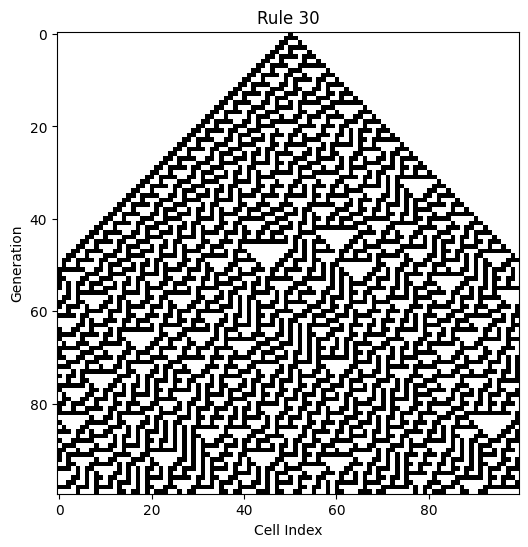

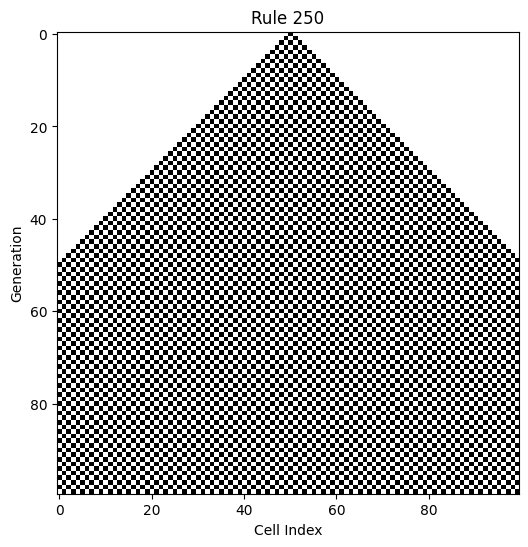

In [9]:
ca_rule_30 = CellularAutomaton1D(rule_number=30, size=100, steps=100, init_cond='single')
ca_rule_30.run()
ca_rule_30.display()

ca_rule_250 = CellularAutomaton1D(rule_number=250, size=100, steps=100, init_cond='single')
ca_rule_250.run()
ca_rule_250.display()


Example 02: Add afunction to display all Cellular Automata

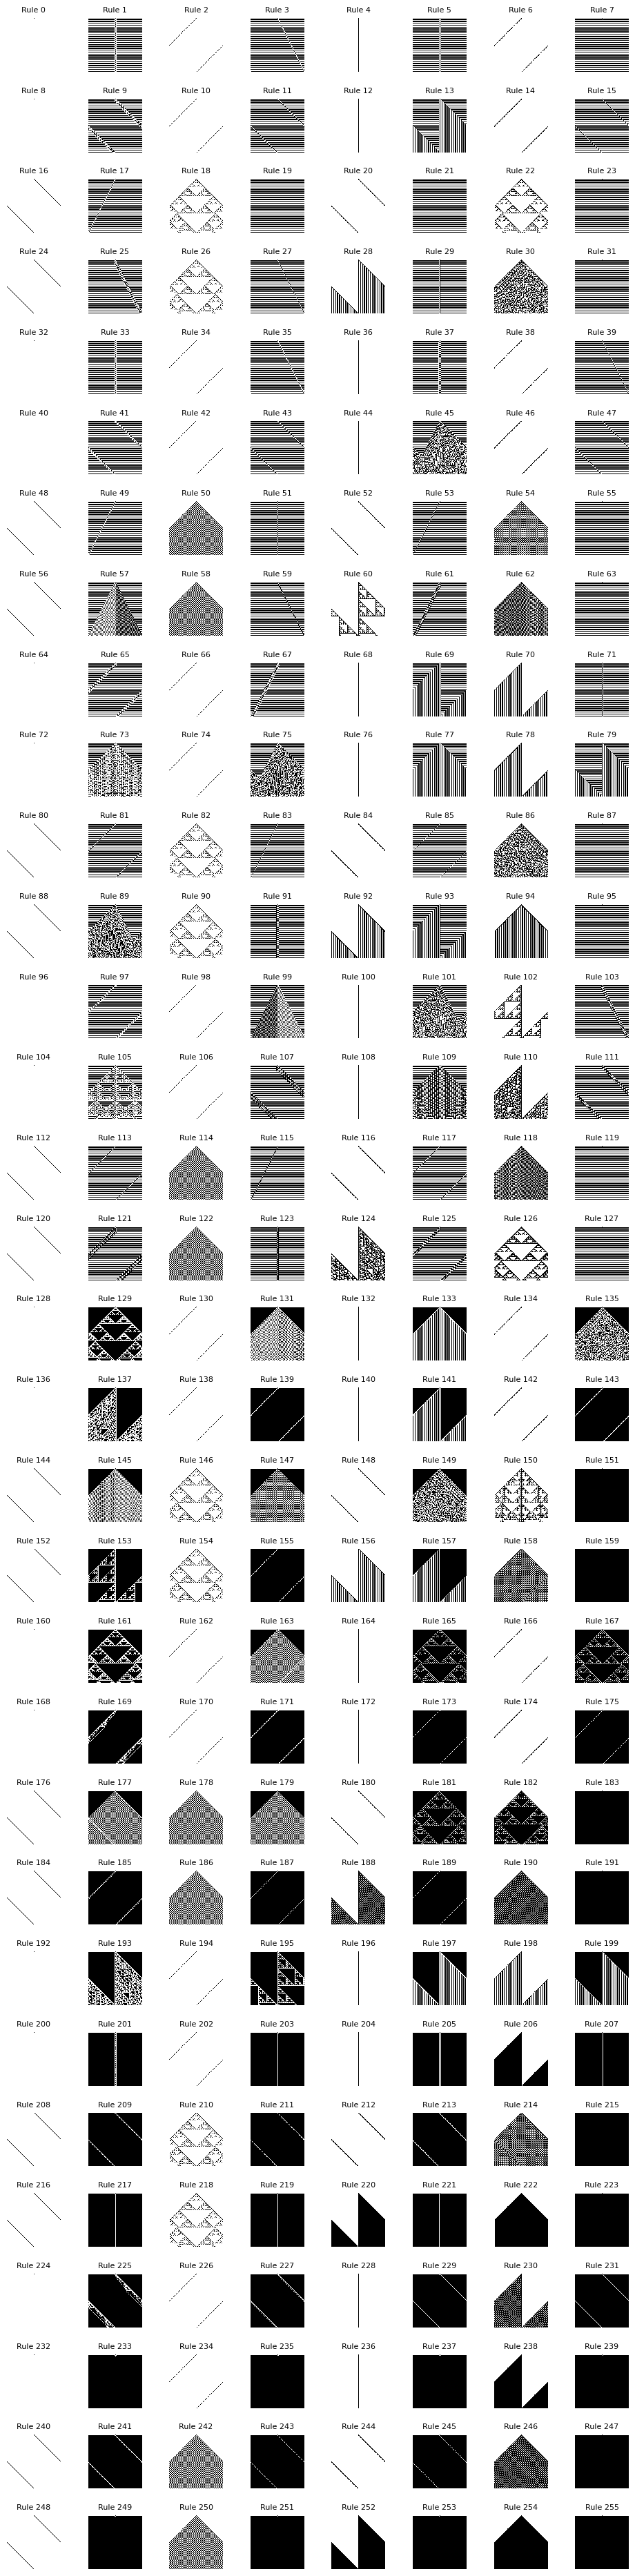

In [14]:
def generate_all_automata(size=40, steps=40, init_cond='single'):
    automata_grids = []
    for rule_number in range(256):
        ca = CellularAutomaton1D(rule_number=rule_number, size=size, steps=steps, init_cond=init_cond)
        ca.run()
        grid = ca.get_grid()
        automata_grids.append(grid)
    return automata_grids


def display_all_automata(automata_grids, items_per_row=10, output_filename="all_rules.png"):
    total_automata = len(automata_grids)
    num_rows = total_automata // items_per_row
    if total_automata % items_per_row != 0:
        num_rows += 1

    fig, axes = plt.subplots(num_rows, items_per_row, figsize=(items_per_row * 1.5, num_rows * 1.5))
    # Increase hspace to add more vertical space between rows
    plt.subplots_adjust(wspace=0.1, hspace=0.5)

    for idx, grid in enumerate(automata_grids):
        row = idx // items_per_row
        col = idx % items_per_row
        if num_rows > 1:
            ax = axes[row, col]
        else:
            ax = axes[col]
        ax.imshow(grid, cmap='binary', interpolation='nearest')
        ax.set_title(f'Rule {idx}', fontsize=8)
        ax.axis('off')

    # Hide any unused subplots
    for idx in range(total_automata, num_rows * items_per_row):
        row = idx // items_per_row
        col = idx % items_per_row
        if num_rows > 1:
            ax = axes[row, col]
        else:
            ax = axes[col]
        ax.axis('off')

    plt.savefig(output_filename, dpi=300)
    plt.show()

# Generate and display all automata
automata_grids = generate_all_automata(size=100, steps=100, init_cond='single')
display_all_automata(automata_grids, items_per_row=8)
